In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, average_precision_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

### Load Dataset
- Binary classification data (breat cancer data)
- Calibrate the class ratio to make it a bit more unbalanced; this step can be negelected or modified

In [55]:
data = datasets.load_breast_cancer()

In [56]:
X_data = data.data
y_data = data.target    

In [57]:
X_data.shape

(569, 30)

In [58]:
# original data has 212 '0' (malignant) and 357 '1' (benign) class labels
counts = Counter(y_data)
print(counts)     

Counter({1: 357, 0: 212})


In [59]:
y_data.shape

(569,)

In [60]:
y_data = y_data.reshape((y_data.shape[0], 1))

In [61]:
y_data.shape

(569, 1)

In [62]:
data_merged = np.concatenate((X_data, y_data), axis = 1)

In [63]:
data_merged.shape

(569, 31)

In [64]:
data_merged = data_merged[data_merged[:, -1].argsort()]

In [65]:
imbal_data = data_merged[50:] # Removing 50 of 0 instances

In [66]:
X_data = imbal_data[:, :-1]
y_data = imbal_data[:, -1]

In [67]:
# now, we have a slightly more unbalanced dataset of about 2:1
counts = Counter(y_data)
print(counts)    

Counter({1.0: 357, 0.0: 162})


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

### Create model
- Create a classification model
- Verify its overall performance (rand accuracy, precision, recall, f1-score, etc.)

In [69]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = clf.predict(X_test)

In [71]:
print(accuracy_score(y_test, y_pred))    # 92.9% of rand accuracy

0.9615384615384616


In [72]:
print(y_pred)
print(y_test)

[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.]
[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]


In [73]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)    # show confusion matrix

[[ 41   5]
 [  1 109]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93        46
         1.0       0.96      0.99      0.97       110

    accuracy                           0.96       156
   macro avg       0.97      0.94      0.95       156
weighted avg       0.96      0.96      0.96       156



### 1. ROC curve
- Create ROC curve and calculate ROC_AUC score

In [75]:
y_score = clf.predict_proba(X_test)    # predict probabilities of each data instance to calculate the ROC curve

In [77]:
y_score = np.array(y_score[:, -1], dtype = np.float32) # Only getting the probabilities of one of the classes

In [78]:
print(y_score)

[0.71 0.21 0.01 1.   0.02 1.   0.98 1.   0.96 0.32 0.98 1.   1.   1.
 1.   1.   0.88 0.91 0.98 0.   0.93 0.   1.   0.94 1.   1.   0.95 0.02
 1.   0.04 1.   1.   0.   1.   0.99 1.   0.94 1.   0.04 0.99 1.   0.14
 0.   0.78 0.99 0.95 1.   0.97 1.   1.   0.82 1.   0.   1.   1.   0.08
 1.   1.   0.42 1.   0.95 0.05 1.   0.86 0.08 1.   1.   1.   0.99 1.
 0.99 1.   1.   1.   0.06 0.94 0.75 0.99 0.02 1.   0.01 0.99 1.   1.
 1.   0.   1.   0.98 1.   0.76 0.07 0.85 0.66 0.81 0.   1.   0.   0.99
 1.   0.73 0.04 1.   0.   0.94 0.91 0.99 0.   1.   0.   0.04 1.   0.92
 1.   1.   1.   1.   0.25 0.97 0.99 1.   0.99 0.67 0.01 0.98 0.94 0.04
 0.78 0.95 0.68 1.   0.54 0.75 0.75 0.44 1.   0.   1.   0.01 0.   1.
 0.11 1.   0.27 0.04 0.99 0.96 1.   0.86 0.   1.   0.87 0.82 0.92 1.
 0.   0.07]


In [21]:
print(roc_auc_score(y_test, y_score))

0.992490118577075


In [22]:
fpr, tpr, _ = roc_curve(y_test, y_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


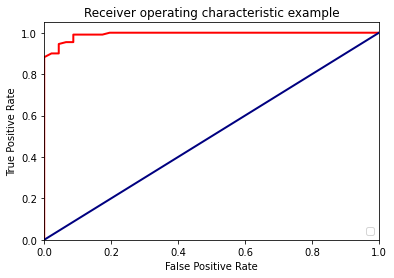

In [23]:
plt.plot(fpr, tpr, color= 'red', lw = 2)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2. Bookmaker's Informedness
- Calculate bookmaker's informedness & markedness
- Definition (Powers 2011)
    - "Informedness quantifies how informed a predictor is for the specified condition, and specifies the probability that a prediction is informed in relation to the condition (versus chance)"
    - "Markedness quantifies how marked a condition is for the specified predictor, and specifies the probability that a condition is marked by the predictor (versus chance)"

In [24]:
tn, fp, fn, tp = confusion_mat.ravel()

In [25]:
print(tn, fp, fn, tp)

41 5 1 109


In [26]:
recall = tp / (tp + fn)
inverse_recall = tn / (fp + tn)
precision = tp / (tp + fp)
inverse_precision = tn / (fn + tn)

In [27]:
informedness = recall + inverse_recall - 1
markedness = precision + inverse_precision - 1

In [28]:
print('Informedness: ', informedness)
print('Markedness: ', markedness)

Informedness:  0.8822134387351779
Markedness:  0.9323308270676691
